# 1.Autoencoder

In [1]:
import keras
import tensorflow as tf
from keras import layers
from keras.datasets import mnist
import numpy as np
from keras.datasets import cifar10
import tensorflow.keras as tfk
from keras.layers import Input, Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.models import Model,Sequential

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)  
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
input = Input(shape=(32, 32, 3)) 
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [6]:
#compile model
autoencoder = Model(input, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 32)        0   

In [7]:
result = autoencoder.fit(x_train,x_train,epochs=20,batch_size=128,shuffle=True,validation_data=(x_test, x_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 6s 121us/step - loss: 0.5787 - val_loss: 0.5650
Epoch 2/20
50000/50000 [==============================] - 4s 84us/step - loss: 0.5629 - val_loss: 0.5634
Epoch 3/20
50000/50000 [==============================] - 4s 86us/step - loss: 0.5608 - val_loss: 0.5610
Epoch 4/20
50000/50000 [==============================] - 4s 82us/step - loss: 0.5599 - val_loss: 0.5598
Epoch 5/20
50000/50000 [==============================] - 4s 81us/step - loss: 0.5589 - val_loss: 0.5591
Epoch 6/20
50000/50000 [==============================] - 4s 82us/step - loss: 0.5583 - val_loss: 0.5586
Epoch 7/20
50000/50000 [==============================] - 4s 82us/step - loss: 0.5578 - val_loss: 0.5583
Epoch 8/20
50000/50000 [==============================] - 4s 88us/step - loss: 0.5575 - val_loss: 0.5578
Epoch 9/20
50000/50000 [==============================] - 4s 84us/step - loss: 0.5571 - val_loss: 0.5577
Epoc

In [8]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(autoencoder.predict(x_test)[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

<Figure size 2000x400 with 20 Axes>

# Deep CNN

In [9]:
#build model

tfkl = tfk.layers
model = tfk.Sequential()
model.add(tfkl.Conv2D(filters=64, kernel_size=3, strides=1,padding='valid', activation='relu', input_shape=(32,32,3))) 
model.add(tfkl.MaxPooling2D(pool_size=(2,2)))
model.add(tfkl.Dropout(0.2))
model.add(tfkl.Conv2D(filters=32, kernel_size=3, strides=1,padding='valid', activation='relu'))
model.add(tfkl.MaxPooling2D(pool_size=(2, 2)))
model.add(tfkl.Dropout(0.2))
model.add(tfkl.Flatten())
model.add(tfkl.Dense(32, activation='relu'))
model.add(tfkl.Dropout(0.2))
model.add(tfkl.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [10]:
model.compile(optimizer=tfk.optimizers.RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
from keras.utils import to_categorical
y_train_label = to_categorical(y_train)
y_test_label = to_categorical(y_test)

In [12]:
result = model.fit(x_train,y_train_label,
        batch_size = 32,
        epochs=10,
        validation_data=(x_test, y_test_label),
        shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 110us/sample - loss: 1.7277 - accuracy: 0.3683 - val_loss: 1.6053 - val_accuracy: 0.4545
Epoch 2/10
50000/50000 [==============================] - 5s 99us/sample - loss: 1.4090 - accuracy: 0.4951 - val_loss: 1.2533 - val_accuracy: 0.5536
Epoch 3/10
50000/50000 [==============================] - 5s 94us/sample - loss: 1.2954 - accuracy: 0.5426 - val_loss: 1.1558 - val_accuracy: 0.5929
Epoch 4/10
50000/50000 [==============================] - 5s 94us/sample - loss: 1.2240 - accuracy: 0.5695 - val_loss: 1.0767 - val_accuracy: 0.6240
Epoch 5/10
50000/50000 [==============================] - 5s 94us/sample - loss: 1.1807 - accuracy: 0.5844 - val_loss: 1.0875 - val_accuracy: 0.6252
Epoch 6/10
50000/50000 [==============================] - 5s 93us/sample - loss: 1.1551 - accuracy: 0.5966 - val_loss: 1.1506 - val_accuracy: 0.6011
Epoch 7/10
50000/50000 [==============================]

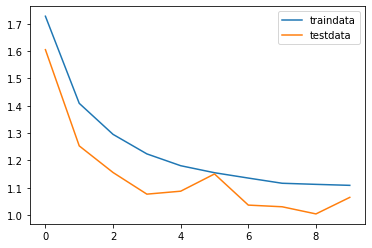

In [13]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(labels=['traindata','testdata'])

Text(0, 0.5, 'accuracy')

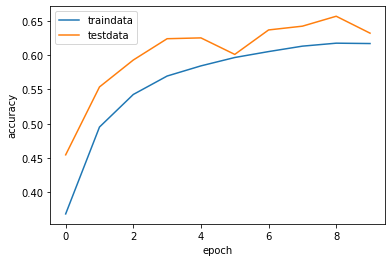

In [14]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.legend(labels=['traindata','testdata'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

In Deep CNN, I use kenel size (3,3), strides=1,padding='valid', activation='relu'

# 2.2 Transfer learning

In [15]:
from tensorflow.keras.applications import VGG16

In [16]:
conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [17]:
model2 = tfk.Sequential()
model2.add(conv_base)
model2.add(tfkl.Flatten())
model2.add(tfkl.Dense(32, activation='relu'))
model2.add(tfkl.Dropout(0.2))
model2.add(tfkl.Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                16416     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 14,731,434
Trainable params: 14,731,434
Non-trainable params: 0
_________________________________________________________________


In [18]:
conv_base.trainable = False
model2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
result=model.fit(x_train, y_train_label, epochs=30, batch_size=32,validation_data=(x_test,y_test_label))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 5s 92us/sample - loss: 1.0985 - accuracy: 0.6221 - val_loss: 1.0798 - val_accuracy: 0.6354
Epoch 2/30
50000/50000 [==============================] - 5s 93us/sample - loss: 1.0900 - accuracy: 0.6273 - val_loss: 1.1880 - val_accuracy: 0.6090
Epoch 3/30
50000/50000 [==============================] - 5s 92us/sample - loss: 1.0859 - accuracy: 0.6296 - val_loss: 1.0192 - val_accuracy: 0.6502
Epoch 4/30
50000/50000 [==============================] - 5s 96us/sample - loss: 1.0954 - accuracy: 0.6272 - val_loss: 1.0760 - val_accuracy: 0.6255
Epoch 5/30
50000/50000 [==============================] - 5s 92us/sample - loss: 1.0893 - accuracy: 0.6293 - val_loss: 1.1199 - val_accuracy: 0.6132
Epoch 6/30
50000/50000 [==============================] - 4s 90us/sample - loss: 1.0922 - accuracy: 0.6285 - val_loss: 1.1759 - val_accuracy: 0.6044
Epoch 7/30
50000/50000 [==============================] 

In [19]:
test_score = model.evaluate(x_test, y_test_label)
train_score = model.evaluate(x_train, y_train_label)
print(test_score)
print(train_score)

50000/50000 [==============================] - 4s 89us/sample - loss: 1.2459 - accuracy: 0.5653
[1.3177366138458253, 0.5379]
[1.2459361793518067, 0.56526]


Text(0, 0.5, 'accuracy')

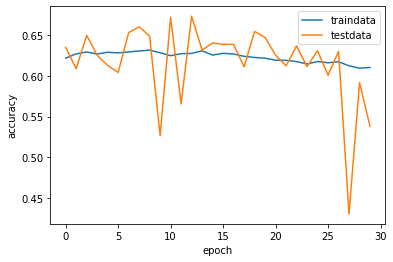

In [20]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.legend(labels=['traindata','testdata'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

# Text Classificatiom

In [21]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from string import printable
from keras import regularizers
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [22]:
text= pd.read_csv('SPAM_detection.csv')

In [23]:
text

,Message,category_val
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [24]:
message=text['Message']
value=text['category_val']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(message)

In [25]:
x=np.asarray(message)
y=np.asarray(value)

In [26]:
tt=pad_sequences(tokenizer.texts_to_sequences(x),padding='post')
indice = np.arange(tt.shape[0])
np.random.shuffle(indice)
textdata=tt[indice]
title=y[indice]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(textdata, title, test_size=0.25)

In [28]:
x_train.shape

(4179, 189)

In [29]:
model=tfk.Sequential()
model.add(tfkl.Embedding(len(tokenizer.word_index)+1, 16, input_length=189))
model.add(tfkl.LSTM(128,return_sequences=True))
model.add(tfkl.GlobalMaxPool1D())
model.add(tfkl.Dropout(0.3))
model.add(tfkl.Dense(64,activation="relu"))
model.add(tfkl.Dropout(0.3))
model.add(tfkl.Dense(32,activation="relu"))
model.add(tfkl.Dropout(0.3))
model.add(tfkl.Dense(1,activation="sigmoid"))

In [30]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 189, 16)           144080    
_________________________________________________________________
lstm (LSTM)                  (None, 189, 128)          74240     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)               

In [31]:
result_text = model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=20,steps_per_epoch=10,batch_size=16)

Train on 4179 samples, validate on 1393 samples
Epoch 1/20
 160/4179 [>.............................] - ETA: 13s - loss: 0.3508 - accuracy: 0.8813 - val_loss: 0.3342 - val_accuracy: 0.8988

In [32]:
test_score = model.evaluate(x_test, y_test)
train_score = model.evaluate(x_train, y_train)
print(test_score)
print(train_score)

4179/4179 [==============================] - 1s 159us/sample - loss: 0.2838 - accuracy: 0.9296
[0.3341908468052542, 0.89877963]
[0.2838093528381858, 0.9296482]


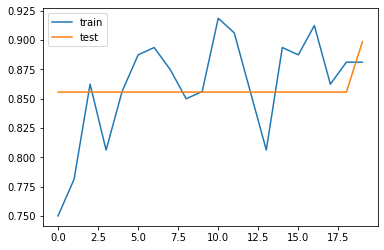

In [33]:
plt.plot(result_text.history["accuracy"])
plt.plot(result_text.history["val_accuracy"])
plt.legend(labels=["train", "test"])

# 3.2 CNN

In [34]:
cnntext = tfk.Sequential()
cnntext.add(tfkl.Embedding(len(tokenizer.word_index)+1, 32, input_length=189))
cnntext.add(tfkl.Conv1D(64, 5, activation='relu'))
cnntext.add(tfkl.GlobalMaxPooling1D())
cnntext.add(tfkl.Dense(10, activation='relu'))
cnntext.add(tfkl.Dropout(0.3))
cnntext.add(tfkl.Dense(1, activation='sigmoid'))
cnntext.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
cnntext.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 189, 32)           288160    
_________________________________________________________________
conv1d (Conv1D)              (None, 185, 64)           10304     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
_________________________________________________________________
dropout_7 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 299,125
Trainable params: 299,125
Non-trainable params: 0
________________________________________________

In [35]:
resultstext = cnntext.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=1024)


Train on 4179 samples, validate on 1393 samples
Epoch 1/20
4179/4179 [==============================] - 1s 195us/sample - loss: 0.6687 - accuracy: 0.8071 - val_loss: 0.6326 - val_accuracy: 0.8557
Epoch 2/20
4179/4179 [==============================] - 0s 33us/sample - loss: 0.6098 - accuracy: 0.8696 - val_loss: 0.5715 - val_accuracy: 0.8557
Epoch 3/20
4179/4179 [==============================] - 0s 29us/sample - loss: 0.5469 - accuracy: 0.8693 - val_loss: 0.5094 - val_accuracy: 0.8557
Epoch 4/20
4179/4179 [==============================] - 0s 29us/sample - loss: 0.4872 - accuracy: 0.8693 - val_loss: 0.4535 - val_accuracy: 0.8557
Epoch 5/20
4179/4179 [==============================] - 0s 30us/sample - loss: 0.4356 - accuracy: 0.8693 - val_loss: 0.4135 - val_accuracy: 0.8557
Epoch 6/20
4179/4179 [==============================] - 0s 30us/sample - loss: 0.4042 - accuracy: 0.8693 - val_loss: 0.3945 - val_accuracy: 0.8557
Epoch 7/20
4179/4179 [==============================] - 0s 31us/sampl

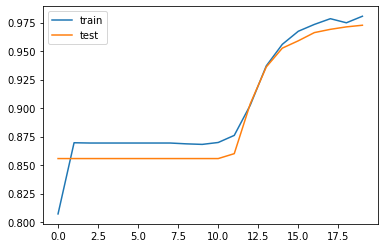

In [36]:
plt.plot(resultstext.history["accuracy"])
plt.plot(resultstext.history["val_accuracy"])
plt.legend(labels=["train", "test"])

# 3.3 ROC

In [37]:
from sklearn.metrics import roc_curve, auc

In [38]:
rnn_pred = cnntext.predict(x_test)

In [39]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, rnn_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

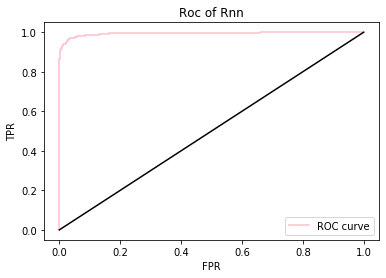

In [40]:
plt.figure()
plt.plot(fpr[0], tpr[0], color='pink', label='ROC curve' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='black')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Roc of Rnn')
plt.legend(loc="lower right")
plt.show()

In [41]:
cnn_pred = cnntext.predict(x_test)

In [42]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, cnn_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

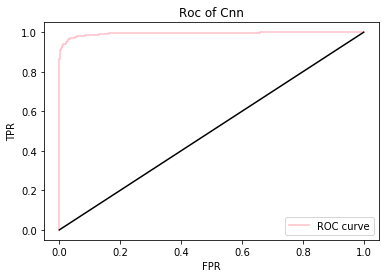

In [43]:
plt.figure()
plt.plot(fpr[0], tpr[0], color='pink', label='ROC curve' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='black')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Roc of Cnn')
plt.legend(loc="lower right")
plt.show()